# Image Detection (Localization) and Segmentation: Problem Solving Methodology

#### In the classification problem, it is necessary to predict the class of the entire image; in the detection problem, it is necessary to predict the class of each object. And in the segmentation problem - each pixel.

## 1 - Detection (Localization)

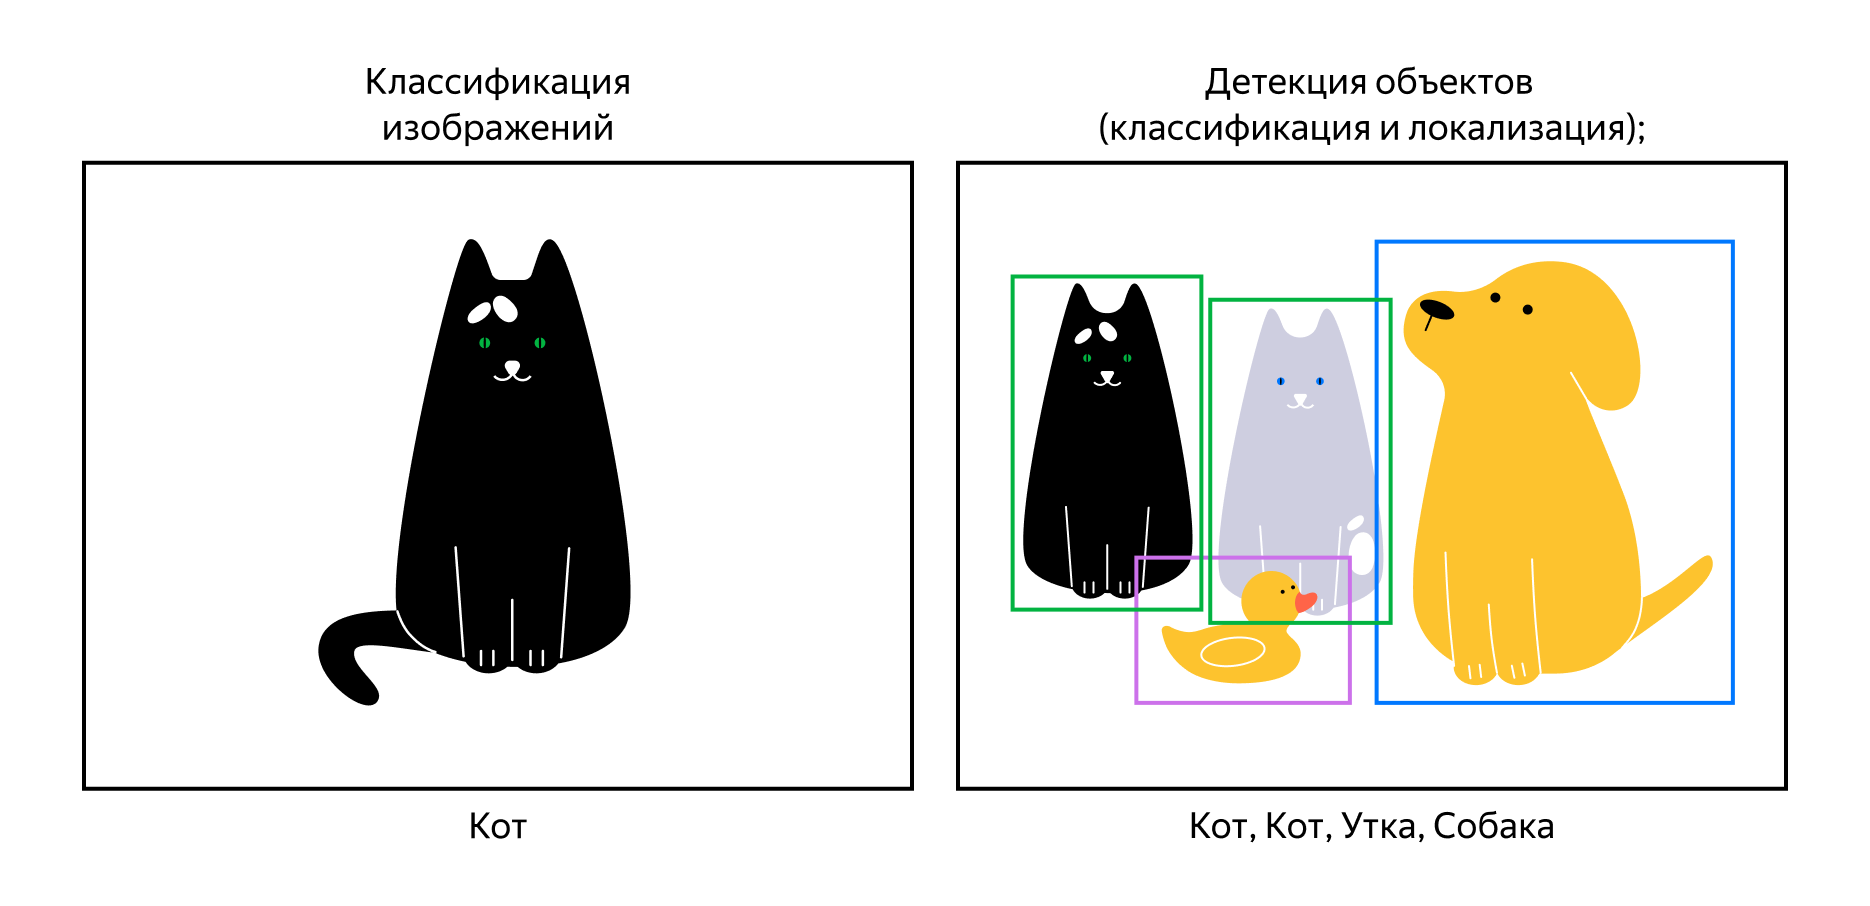

### 1.1 Quality metrics for detection (localization)

Most of quality metrics take into accounts IoU (Intersection over Union): This is the ratio of the area of intersection of two rectangualrs to their total area

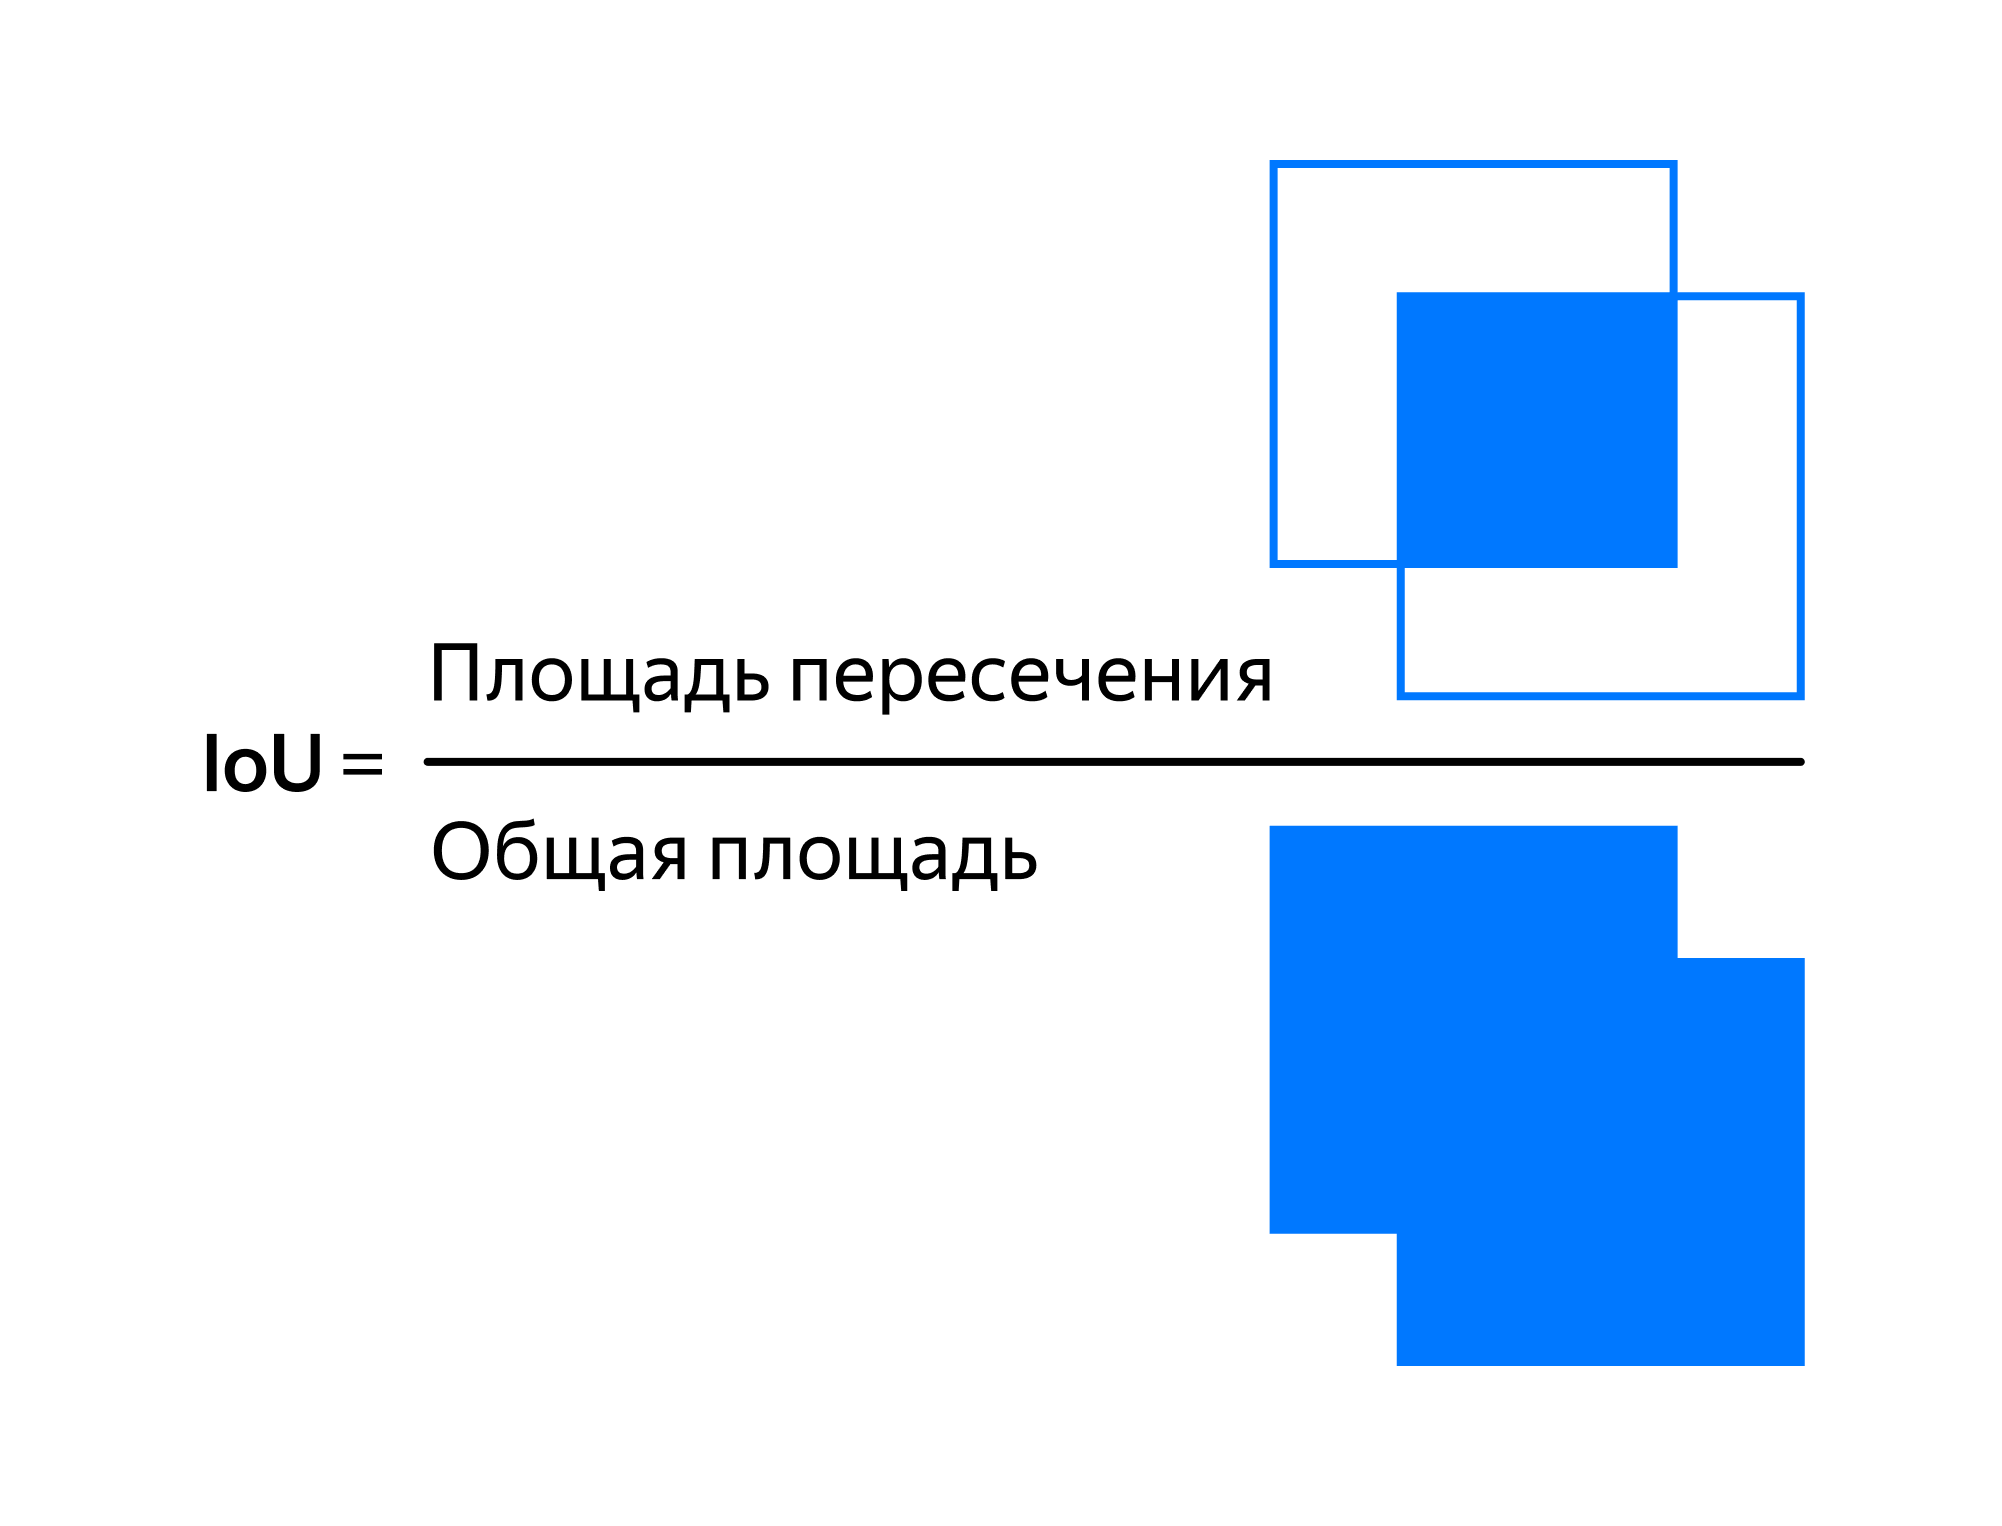

IoU allows to calculate the following scores:

- **True Positive (TP)** — the object is fully covered by the rectangular. The model can not be the same in a validation dataset. That is why detection (localization) can be considered as an accurate if IoU is bigger than the threshold value: **IoU ≥ threshold**.

- **False Positive (FP)** — the object detected (localized) incorrectly, **IoU < threshold**.

- **False Negative (FN)** — the neural network model has not detected (localized) anything at all;

- **True Negative (TN)** — the neural network detected (localized) the empty space on the image correctly (rarely used).


Using these possible results, we can calculate **Precision** and **Recall**:
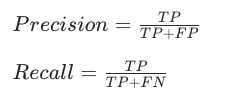
 
 
Based on precision and recall we can also calculate:
- Average Precision, AP — точность выделения отдельных классов;
- Mean Average Precision — среднее арифметическое усреднённых точностей.

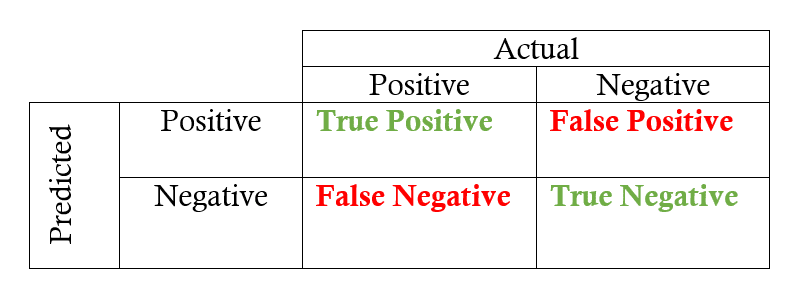

### 1.2 Detection (Localization) Algorithm 

There are two algorithms for detection (localization) problem solving.

#### 2-step detection algorithm
- First, NN extracts the frames where approximately the object might take place. These frames are called **regions of interest**.
- Each region of interest is fed into the input of a convolutional neural network, which classifies the object and tries to “fit the frames” in order to refine the selection of the object.

#### 1-step detection algorithm
1-step algorithm works quicker, but it skips the stage of searching for regions of interest. The model quality reduces.

##### 2-step detection algorithm works better and produces a higher quality neural network.
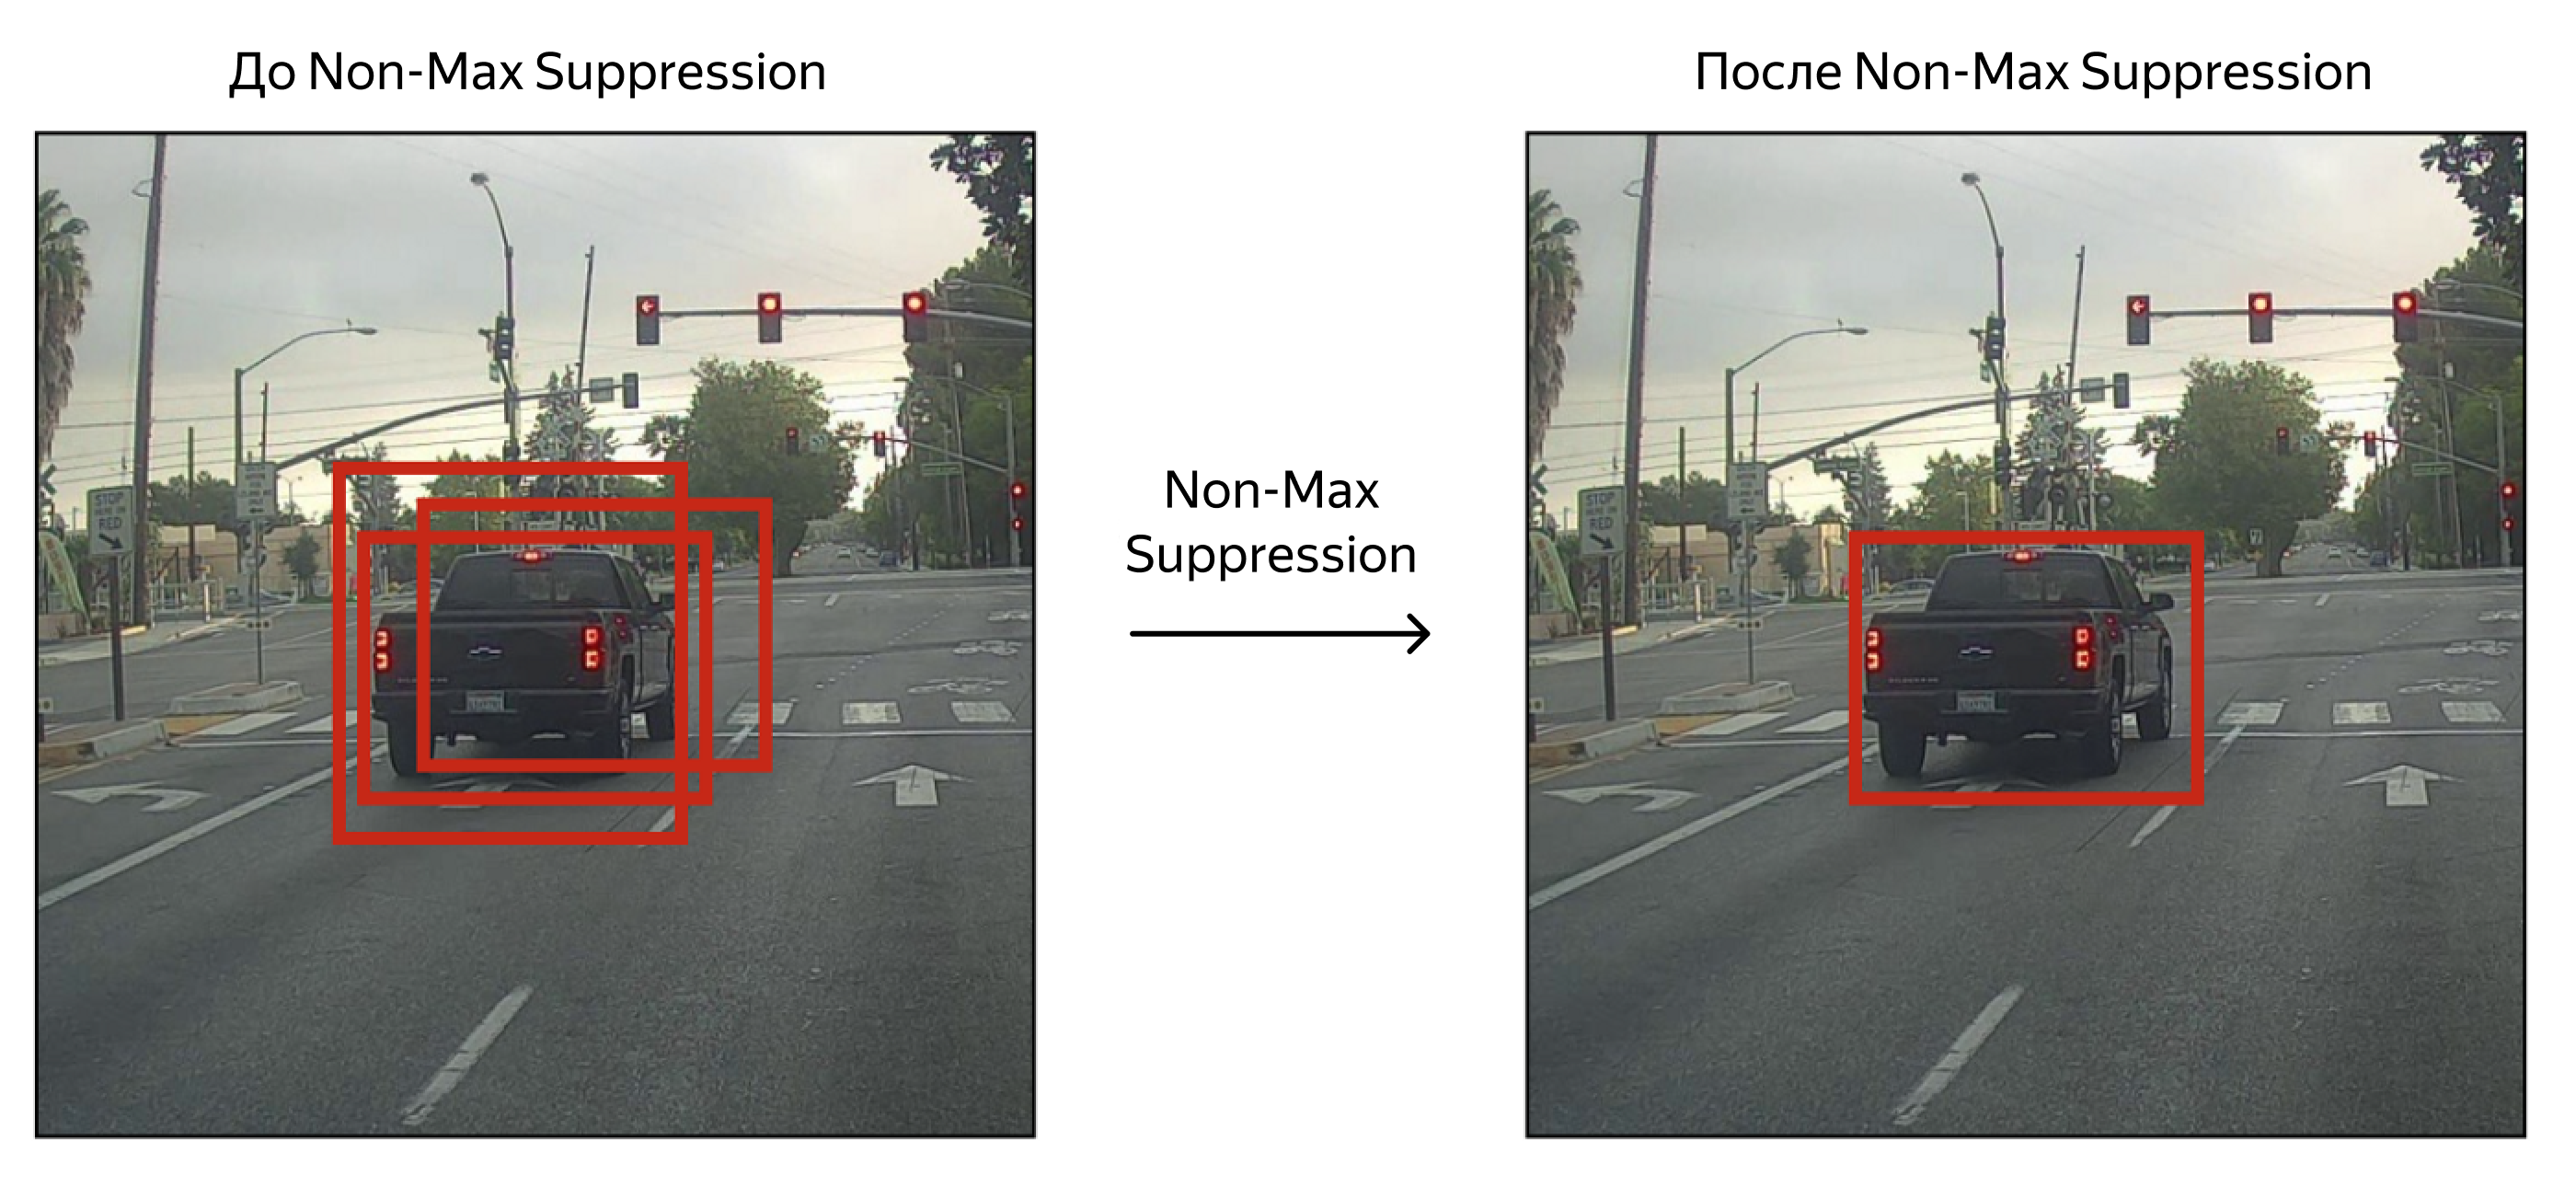

### One of the most popular 1-step NN — YOLO (You Look Only Once). 

### YOLO methodology:

- The whole image is divided into many small pieces;
- NN model predicts, which class each piece belongs to;
- Pieces of one pbject are united in big objects;
- Using **Non-Maximum Suppression (NMS)** technique we remove extra predictions.
https://pictures.s3.yandex.net/resources/Frame_343_2_1659462067.png

### 1.3 Loss function in detection (localization) problem

Detection (localizatio) problem consists of two parts - first, NN model predicts a class, and then - the frames of interest. Hence, the loss function also consists of several parts:

- Cross-enthroty of image pieces classification;
- The loss function of detection (localization), which takes into account errors in coordinates;
- The loss function for the classification of the entire found rectangle.


### 1.4 The key in detection (localization) problem
If in the near future you need to make your own detector, pay attention to the various [YOLO options](https://arxiv.org/abs/1506.02640). Many of them are already ready for use, it is enough to properly prepare the data and run the desired command in the console.

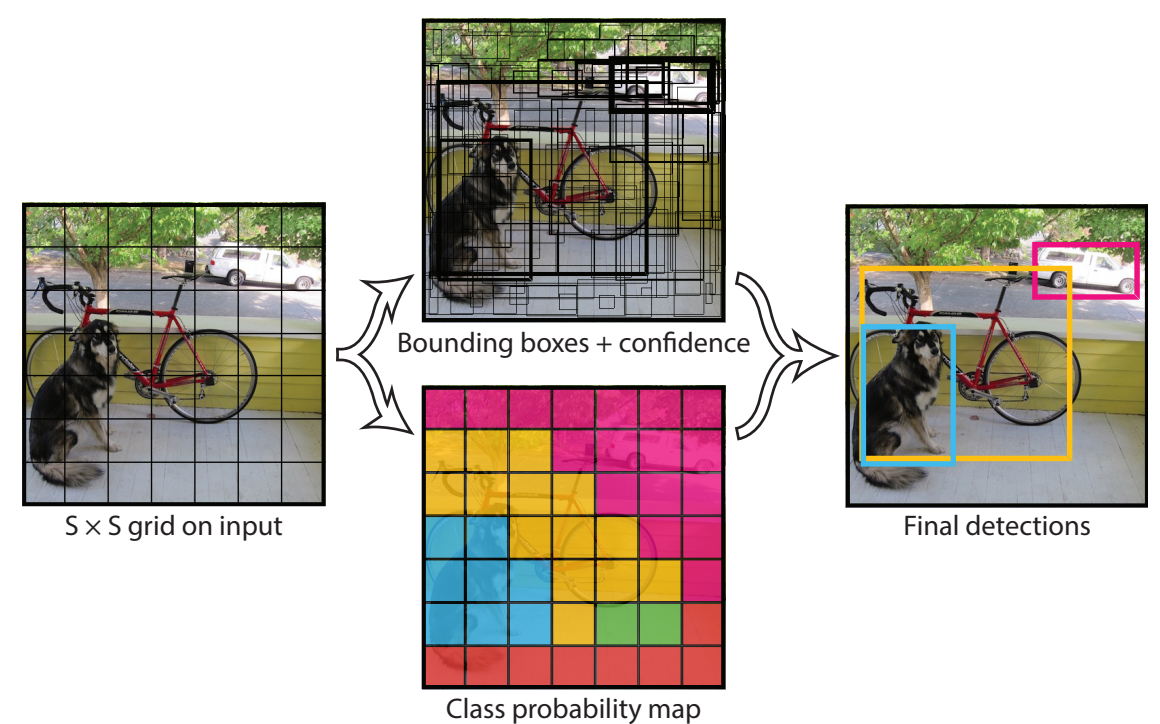

## 2 - Segmentation

In the classification problem, it is necessary to predict the class of the entire image; in the detection problem, it is necessary to predict the class of each object. And in the segmentation problem - each pixel. The output of segmentation looks like this:
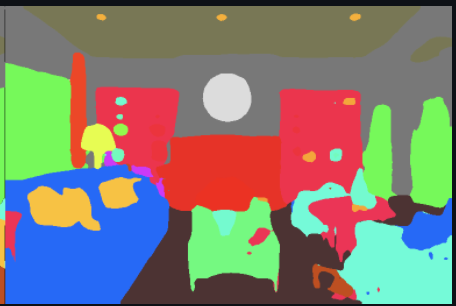

Each color is a separate class: armchair, wall, ceiling, etc.

The segmentation task is divided into subtasks. If you need to assign a certain class to each pixel, then you have the task of semantic segmentation. At the output, the semantic segmentation model should return a mask - an image in which objects of the same class must have the same color. Moreover, if there are two or three sofas in the photo, then they will have one class.

In the instance segmentation problem, each pixel is assigned a specific class instance. In this case, the two sofas will be considered different objects. The output returns a list of objects with a description of their location, assigned class and prediction accuracy. The location of an object is described by contour coordinates or by a mask, a binary matrix the size of an input image. 0 means the absence of the object, 1 means the presence.

### 2.1 Segmentation quality metrics

- In tasks of semantic segmentation, each pixel is assigned a certain class, which makes it possible to calculate the percentage of correct answers per pixel - **Pixel Accuracy**. It is equal to the proportion of pixels for which the model correctly assigned the class.

- For semantic segmentation, the **IoU metric** is also suitable. Instead of rectangles, shapes bounded by contours are taken into account.

- In addition to IoU, you can use the **Sørensen-Dice coefficient**, or 
- the **Dice coefficient** - the ratio of the doubled intersection area to the sum of the areas of the prediction and the real object.
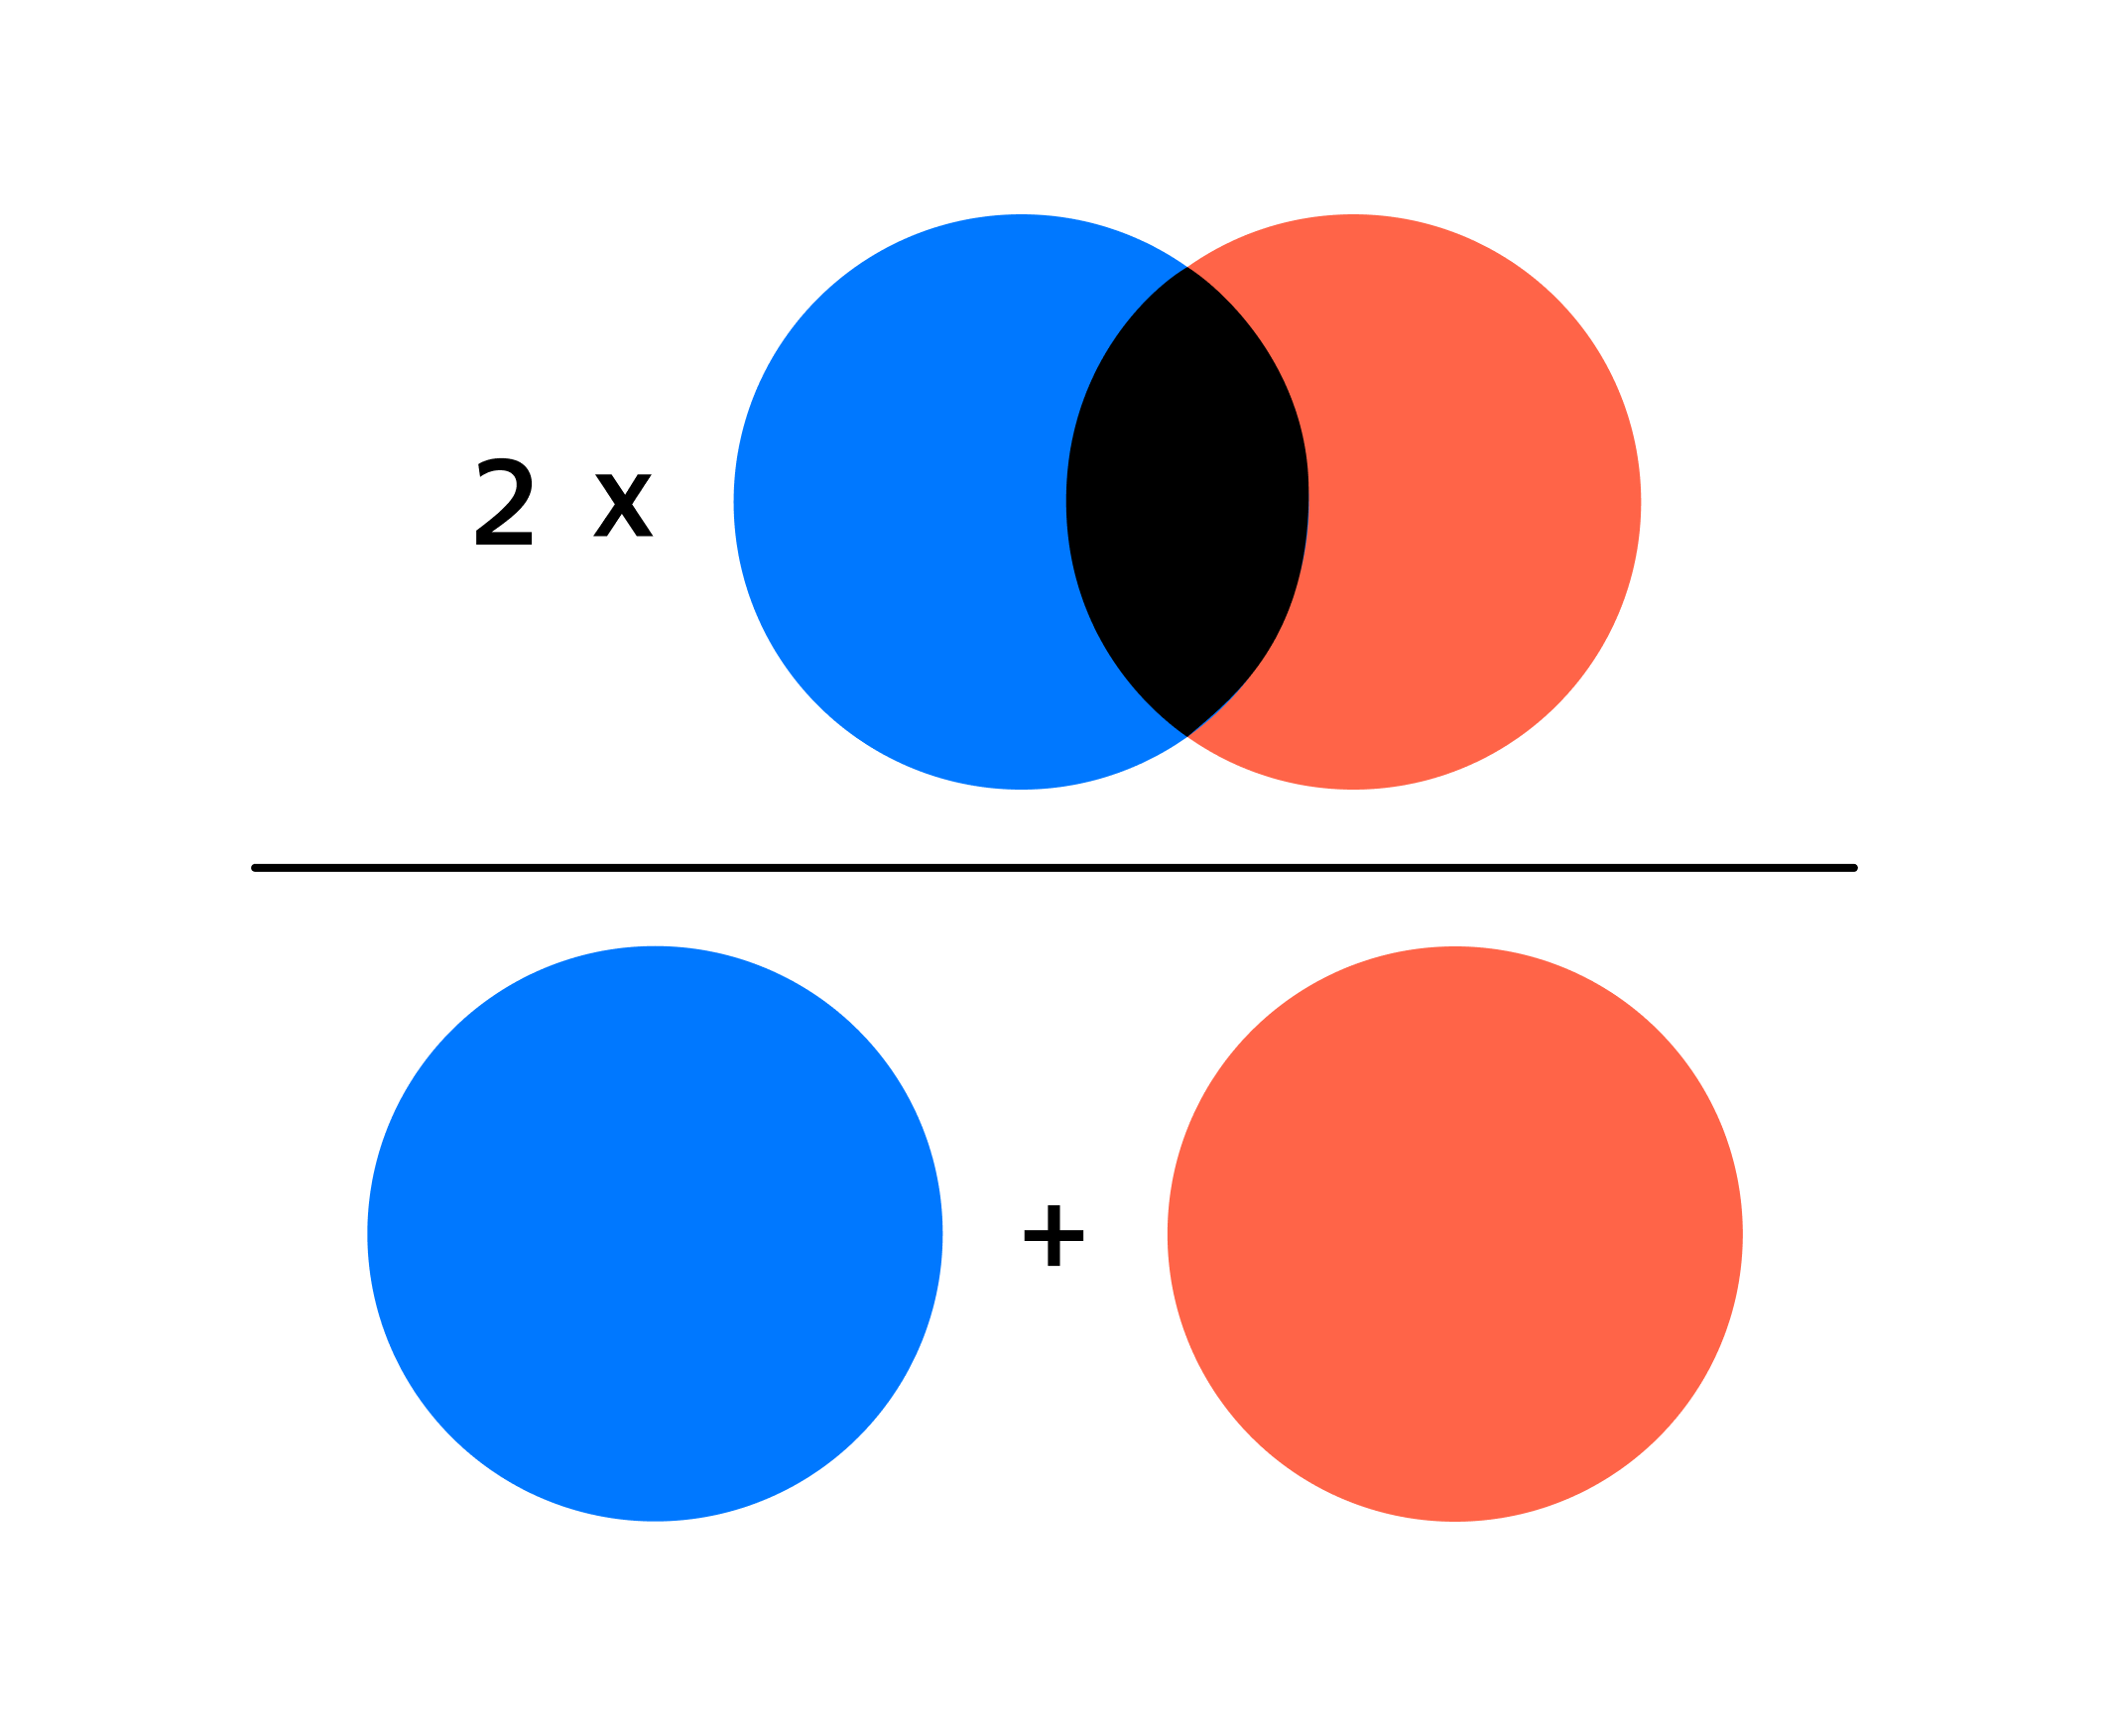

### 2.2 Object segmentation algorithm

The classic model for semantic segmentation is [U-Net](https://arxiv.org/abs/1505.04597).

Like many other computer vision models, U-Net is a neural network. It was designed to find pathologies in medical images. U-Net "looks" at the picture at different scales and determines which class each of the pixels belongs to.

#### Loss function in the segmentation problem
The loss function in the semantic segmentation problem in a simple case is cross-entropy at the pixel level. More complex loss functions are used to segment instances.

### The task of segmentation is to determine the class of each pixel in an image. In the process, the model creates a segmentation mask. The main architecture for the segmentation task is U-Net.